In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numba as nb
import ODEsolver_three_nu as solve
from run_three_nu import g, temp, gs, gss
from run_three_nu import with_spline_ODE, steps_taken
from Emma3 import sterile_production

Three Models

In [2]:
sterile_production(4000, 0.0071, 10**(-10), 0, 0, 7.6e-4, 7.6e-4, 7.6e-4, make_plot=False, folder_name="e2s model")
sterile_production(4000, 0.0071, 0, 10**(-10), 0, 7.6e-4, 7.6e-4, 7.6e-4, make_plot=False, folder_name="m2s model")
sterile_production(4000, 0.0071, 0, 0, 10**(-10), 7.6e-4, 7.6e-4, 7.6e-4, make_plot=False, folder_name="t2s model")


0.010941957552531776

In [3]:
edata = np.load('e2s model/three_nux7.6e-04x1.e-10.npz')
mudata = np.load('m2s model/three_nux7.6e-04x0.e+00.npz')
taudata = np.load('t2s model/three_nux7.6e-04x0.e+00.npz')

CPU times: user 52.6 ms, sys: 3.18 ms, total: 55.7 ms
Wall time: 53.8 ms


Text(0, 0.5, 'Lepton Number $(\\times 10^{-4})}$')

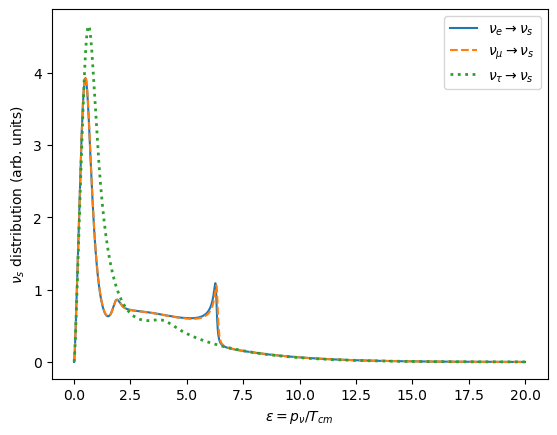

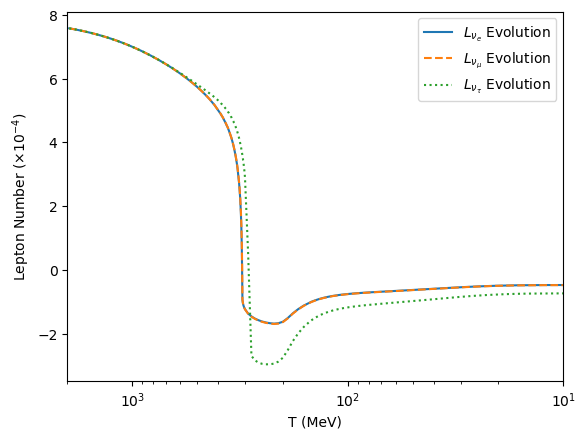

In [12]:
%%time
plt.figure()
plt.plot(edata['epsilon'],edata['epsilon']**2 * edata['final_distribution']*2000)
plt.plot(mudata['epsilon'],mudata['epsilon']**2 * mudata['final_distribution']*2000, linestyle = '--')
plt.plot(taudata['epsilon'],taudata['epsilon']**2 * taudata['final_distribution']*2000, linestyle = ':', linewidth=2)
plt.legend([r'$\nu_{e} \rightarrow \nu_{s}$ ', r'$\nu_{\mu} \rightarrow \nu_{s}$ ', r'$\nu_{\tau} \rightarrow \nu_{s}$ '])

plt.xlabel(r"$\epsilon = p_\nu / T_{cm}$")
plt.ylabel(r"$\nu_s$ distribution (arb. units)")
#image_format = 'png' # e.g .png, .svg, etc.
#image_name = 'spectra.png'

#plt.savefig(image_name, format=image_format, dpi=1200)


plt.figure()
plt.semilogx(edata['T'], 10**4*edata['lep_evo_e'])
plt.semilogx(mudata['T'], 10**4*mudata['lep_evo_mu'], linestyle = '--')
plt.semilogx(taudata['T'], 10**4*taudata['lep_evo_tau'], linestyle = ':')
plt.legend([r'$L_{\nu_e}$ Evolution', r'$L_{\nu_{\mu}}$ Evolution', r'$L_{\nu_{\tau}}$ Evolution'])
plt.xlim(2000,10)
plt.xlabel("T (MeV)")
plt.ylabel(r"Lepton Number $(\times 10^{-4})}$")
#image_format = 'png' # e.g .png, .svg, etc.
#image_name = 'leptonplot_e.png'

#plt.savefig(image_name, format=image_format, dpi=1200)

One model

In [5]:
sterile_production(4000, 0.0071, 10**(-10), 10**(-10), 10**(-10), 7.6e-4, 7.6e-4, 7.6e-4, make_plot=False, folder_name="e+m+t2s model")


0.020749563613032106

In [6]:
data = np.load('e+m+t2s model/three_nux7.6e-04x1.e-10.npz') 

CPU times: user 59.5 ms, sys: 4.48 ms, total: 64 ms
Wall time: 62.2 ms


Text(0, 0.5, 'Lepton Number $(\\times 10^{-4})}$')

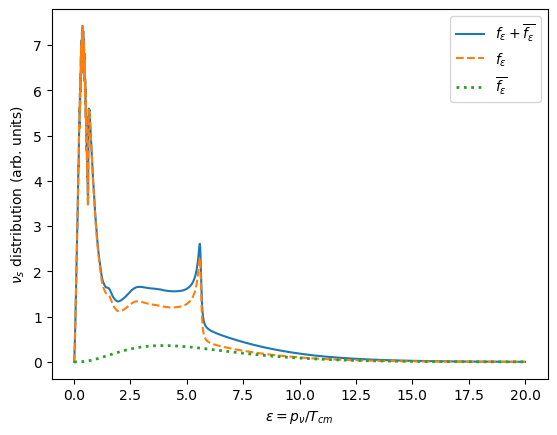

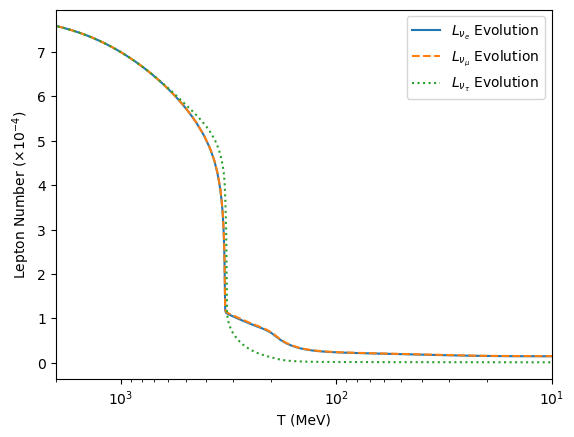

In [14]:
%%time
plt.figure()
plt.plot(data['epsilon'],data['epsilon']**2 * data['final_distribution']*2000)
plt.plot(data['epsilon'],data['epsilon']**2 * data['sterile_evo'][-1]*2000, linestyle = '--')
plt.plot(data['epsilon'],data['epsilon']**2 * data['anti_sterile_evo'][-1]*2000, linestyle = ':', linewidth=2)
plt.legend(['$f_{\epsilon} +\overline{f_{\epsilon}}$ ', '$f_{\epsilon}$', '$\overline{f_{\epsilon}}$'])

plt.xlabel(r"$\epsilon = p_\nu / T_{cm}$")
plt.ylabel(r"$\nu_s$ distribution (arb. units)")
#image_format = 'png' # e.g .png, .svg, etc.
#image_name = 'spectra.png'

#plt.savefig(image_name, format=image_format, dpi=1200)


plt.figure()
plt.semilogx(data['T'], 10**4*data['lep_evo_e'])
plt.semilogx(data['T'], 10**4*data['lep_evo_mu'], linestyle = '--')
plt.semilogx(data['T'], 10**4*data['lep_evo_tau'], linestyle = ':')
plt.legend([r'$L_{\nu_e}$ Evolution', r'$L_{\nu_{\mu}}$ Evolution', r'$L_{\nu_{\tau}}$ Evolution'])
plt.xlim(2000,10)
plt.xlabel("T (MeV)")
plt.ylabel(r"Lepton Number $(\times 10^{-4})}$")
#image_format = 'png' # e.g .png, .svg, etc.
#image_name = 'leptonplot_e.png'

#plt.savefig(image_name, format=image_format, dpi=1200)

Comparing

Text(0, 0.5, '$\\nu_s$ distribution (arb. units)')

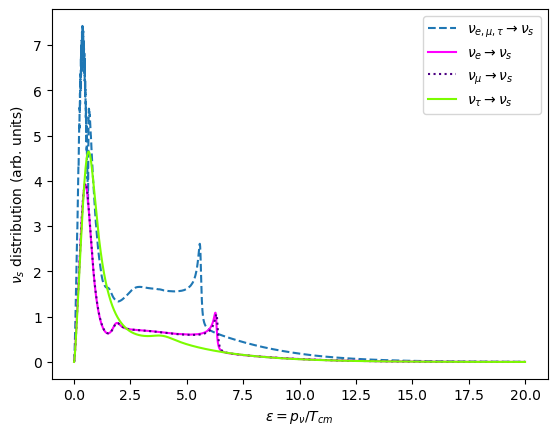

In [24]:
plt.figure()
plt.plot(data['epsilon'],data['epsilon']**2 * data['final_distribution']*2000, linestyle = '--')
plt.plot(edata['epsilon'],edata['epsilon']**2 * edata['final_distribution']*2000, color = 'magenta')
plt.plot(mudata['epsilon'],mudata['epsilon']**2 * mudata['final_distribution']*2000, linestyle = ':', color = 'indigo')
plt.plot(taudata['epsilon'],taudata['epsilon']**2 * taudata['final_distribution']*2000, color = 'lawngreen')
plt.legend([r'$\nu_{e,\mu, \tau} \rightarrow \nu_s$', r'$\nu_e \rightarrow \nu_s$', r'$\nu_{\mu} \rightarrow \nu_s$', r'$\nu_{\tau} \rightarrow \nu_s$'])
plt.xlabel(r"$\epsilon = p_\nu / T_{cm}$")
plt.ylabel(r"$\nu_s$ distribution (arb. units)")
